## <p style="text-align: right;"> Nic Wiggins </p>

You **NEED** to participate both individually and in groups in class to successfully complete this assignment and receive credits for it.

# In-Class Assignment: Singular Value Decomposition

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/1024px-Singular-Value-Decomposition.svg.png" width='40%'>
From: https://en.wikipedia.org/wiki/Singular_value_decomposition

### Agenda for today's class (80 minutes)

</p>

1. (20 minutes) Pre-Class Assignment Review
1. (20 minutes) Singular Value Decomposition
1. (40 minutes) Using SVD for Dimensionality Reduction

----
# 1. SVD Pre-Class Assignment Review

[16--SVD-pre-class-assignment](../preclass/16--SVD-pre-class-assignment.ipynb)

<img src="https://slideplayer.com/slide/4792782/15/images/9/The+Singular+Value+Decomposition.jpg" width="70%">

----
# 2. Singular Value Decomposition

In the pre-class assignement, we computed the matrices $U$ and $V$ from the eigendecomposition of $AA^\top$ and $A^\top A$, and the matrix $\Sigma$ comes from the eigenvalues of $A^\top A$ or $AA^\top$. Here, we would like to explain why we can do this. 

* We have $AA^\top = UD_1U^\top$ because $AA^\top$ is symmetric positive semidefinite. All diagonal elements in $D_1$ are nonnegative. Let $U=[u_1,\dots, u_m]$
* We have $A^\top A = VD_2V^\top$ because $A^\top A$ is symmetric positive semidefinite. All diagonal elements in $D_2$ are nonnegative. Note the size of $D_1$ may not be the same. $D_1$ has size $m\times m$, and $D_2$ has size $n\times n$. Let $V=[v_1,\dots, v_m]$
* WLOG, we assume that the diagonal elements of $D_1$ and $D_2$ are in decreasing order. That is $\sigma_1^2\geq \sigma_2^2\geq \dots \geq \sigma_r^2$, where $r$ is the rank of the matrix.
* Assume that $v_1$ is the unit eigenvector of $A^\top A$ corresponding to the eigenvalue $\sigma_1^2$. That is 
$$A^\top A v_1 = \sigma_1^2 v_1$$
Multiply $A$ to the left and we have 
$$AA^\top A v_1 = \sigma_1^2 Av_1$$
That is $Av_1$ is an eigenvector of $AA^\top$ corresponding to $\sigma_1^2$.
* We measure the length of $Av_1$. 
$$(Av_1)\cdot (Av_1) = v_1 A^\top A v_1 = v_1 \cdot \sigma_1^2 v_1 = \sigma_1^2$$
That is $\|Av_1\|=\sigma_1$, and ${1\over\sigma_1}Av_1$ is an unit eigenvector of $AA^\top$ corresponding to $\sigma_1^2$.
* That is ${1\over \sigma_1}Av_1=\pm u_1$. Since we can change the sign for $u$, we let $u_1={1\over \sigma_1}Av_1$.
* Doing this from $\sigma_1$ to $\sigma_r$, we have 
$$[u_1, \cdots, u_r] = A [v_1,\cdots,v_r] \Sigma_{r\times r}^{-1}$$
where $\Sigma_{r\times r}$ is the diagonal matrix with elements $\sigma_1,\dots,\sigma_r$.
* We have the simplified version: 
$$A=[u_1, \cdots, u_r] \Sigma_{r\times r} [v_1,\cdots,v_r]^\top$$
* By completing the orthogonal matrix, we have the full version. 
$$A = U \Sigma V^\top$$


----
# 3. Using SVD for dimensionality reduction

<img src="https://cdn.thinglink.me/api/image/455884818001952770/1240/10/scaletowidth" width="30%">



The following code reads an image file from a website, discards the red and blue channels, and pulls out the 'green' component of the image in a numpy matrix called $A$. 
We will treat this numpy array as a grayscale image. 

In [1]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import math
sym.init_printing()

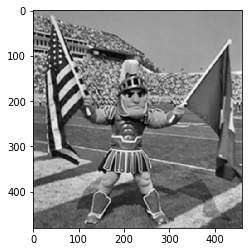

In [2]:
from urllib.request import urlopen, urlretrieve
import imageio

url = 'https://cdn.thinglink.me/api/image/455884818001952770/1240/10/scaletowidth'
file = '.flags.jpeg'

urlretrieve(url, file);

im = imageio.imread(file)

A = np.matrix(im[:,:,1])
plt.imshow(A, cmap='gray');

## Step 1: Singular Value Decomposition
The following code does a singular value decomposition (SVD) of the image matrix $A$. 

$$A = U\Sigma V^T$$

**Note:** This may take a while.......hopefully you should only need to do this once...

In [3]:
%%time
import scipy.linalg as la

U, e, Vt = np.linalg.svd(A)

CPU times: user 407 ms, sys: 40.4 ms, total: 447 ms
Wall time: 971 ms


In [4]:
U = np.matrix(U)
U.shape

In [5]:
e.shape

In [6]:
Vt = np.matrix(Vt)
Vt.shape

<font color=red>** QUESTION:**</font> Remember that the scipy ```svd``` function returns $U$, a vector of singular values ($\sigma$) and the transpose of $V$.  Verify the success of the decomposition by regenerating $A$ from the calculated components and comparing the regenerated $A$ to the original image $A$ using the numpy ```allclose``` function.

In [13]:
e1 = np.diag(e)


In [18]:
e.shape[0]

In [22]:
A.shape

In [23]:
np.pad(e1,((0,A.shape[0]-e.shape[0]),(0,A.shape[1]-e.shape[0])), 'constant').shape

In [35]:
#Put your answer here 
# You need to create a matrix of the same size of $A$ with diagonal elements from the singular values, 
# while all other values being zero.

S = np.pad(np.diag(e),((0,A.shape[0]-e.shape[0]),(0,A.shape[1]-e.shape[0])), 'constant')
# see below for a easier way
# Sigma matrix should be the same size as the original A matrix with mostly zero values
#S = np.zeros(A.shape)
# The upper left diagonal of the Sigma matrix should be the singular values
#S[:len(e), :len(e)] = np.diag(e)


S.shape


In [36]:
new_im = U*S*Vt

In [37]:
np.isclose(new_im,A)

matrix([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])

<font color=red>** QUESTION:**</font> We use the np.allclose function instead of a simple python equality (==) to account for small errors in calculation. Where do these errors come from?  

Rounding errors in multiplication

## Step 2: Removing small singular values.

We are now going to make a new image but only keep the $N$ biggest singular values while setting all of the rest to zero. First we define a new vector (```s```) consisting of the first $N=10$ singular values:

In [59]:
s = e[:130]
s

array([57861.39374486,  8074.25008464,  6761.61835812,  5871.84814212,
        5219.85177618,  5038.59791196,  4897.28551904,  4629.66472373,
        4039.52986446,  3671.64733387,  3590.14652458,  3099.96797547,
        2984.00922812,  2897.77769037,  2775.04583703,  2494.62932486,
        2277.32399339,  2250.16773803,  2123.86901105,  2088.18804884,
        2051.09428876,  1973.76028163,  1954.59253869,  1907.38233759,
        1789.68664475,  1741.87958504,  1704.29088519,  1639.94689321,
        1589.70894777,  1537.0772226 ,  1487.23740496,  1485.3885638 ,
        1449.19865782,  1389.67819503,  1363.53669205,  1333.95526219,
        1302.74150103,  1296.26324318,  1243.21716732,  1242.02503392,
        1207.78091927,  1179.80509206,  1152.84836954,  1098.89815072,
        1084.86074404,  1071.15412717,  1047.23838602,  1014.54489032,
         989.79711556,   955.21747152,   932.84764523,   888.36700694,
         873.07064777,   847.7670015 ,   842.2523758 ,   815.27276007,
      

Now lets remake the $\Sigma$ matrix using $s$. We will call this new $\Sigma$ matrix ```S``` (capital ```S```). We will use ```S``` to generate a new image and show the rsults:

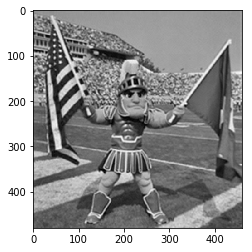

In [60]:
# Sigma matrix should be the same size as the original A matrix with mostly zero values
S = np.zeros(A.shape)

# The upper left diagonal of the Sigma matrix should be the singular values
S[:len(s), :len(s)] = np.diag(s)

#Compressed image
I = U*S*Vt

plt.imshow(I, cmap='gray')

We can plot the difference between the original image and the image generated with only 10 singular values. This represents the error in the image at each pixel.

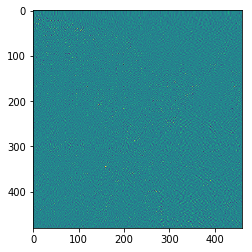

In [61]:
plt.imshow(A-I)

The following calculates the root mean squared error for the image

In [62]:
rmse = np.sqrt(((np.array(A)  - np.array(I)) ** 2).mean())
rmse

Although 10 values seems like a good number, you can really see some distortion in the second image. 
We want to find a better number for $N$. 
The following code makes a plot of the singular values to get an idea of the scale. 
Note that this plot has a $y$-axis that is logarithmic. 

Text(0, 0.5, 'singular value')

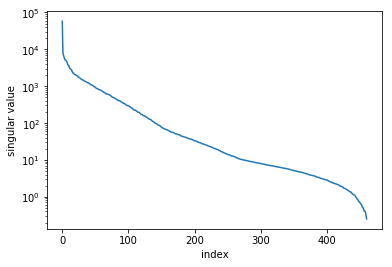

In [63]:
plt.plot(e)
plt.gca().set_yscale('log')
plt.xlabel('index')
plt.ylabel('singular value')

<font color=red>** Question 4.c:**</font> Next, modify the code in **Step 2** to pick a different value for $N$ such that it is hard to tell the difference between the new image and the original image. 
Try to make this $N$ as small as possible. 
Describe The procedure you used to come up with a new value for $N$.  

Using plot of singular values, starting at 50, incrementing by 10 or so

130 is pretty close

## Step 3: Compression

The reason we set a bunch of singular values to zero is to save memory to store this image. 
However, so far we haven't saved anything. 
We can make an estimation of storage of the original image $A$ by multiplying the number of the rows by the number of columns (i.e this is how many numbers we need to store to recreate the image):

In [64]:
A.shape[0]*A.shape[1]

Our new SVD representation requires even more space to store the same information!

In [65]:
U.shape[0]*U.shape[1] + len(s) + Vt.shape[0] * Vt.shape[1]

However, the trick is that singular values of zero  don't add anything to the calculation and the zeros propagate  though the math.  We can now make a new set of matrices, ```U1```,  ```S1```, and ```V1``` which are much smaller than ```U```, ```e```, ```Vt``` because we can remove the rows and columns that turn out to be zero in the math. 

That means we can choose the simplified version. 

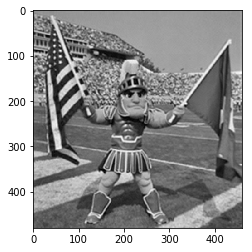

In [66]:
U1 = np.matrix(U[:,:len(s)])
S1 = np.diag(s)
Vt1 = np.matrix(Vt[:len(s),:])

#Compressed image
I = U1*S1*Vt1

plt.imshow(I, cmap='gray')

<font color=red>** QUESTION:**</font> How much space is required to store ```U1```, ```s```, and ```Vt1```? 

In [67]:
U1.shape[0]*U1.shape[1] + len(s) + Vt1.shape[0] * Vt1.shape[1]

<font color=red>** QUESTION:**</font> If everything from above is correct, then we demonstrated that converting an image to a reduced SVD format will save in memory storage. Describe at least two disadvantages of using SVD for image compression.

Lose detail

Takes longer than just storing


-----
### Congratulations, we're almost done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees